In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

### EDA

In [116]:
data=pd.read_csv('data/bhp.csv')
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [117]:
data.shape

(13200, 7)

In [118]:
data.size

92400

In [119]:
data.isna().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [120]:
data.duplicated().sum()

1049

In [121]:
data.drop_duplicates(inplace=True)

In [122]:
data.duplicated().sum()

0

### Detect outlier using boxplot

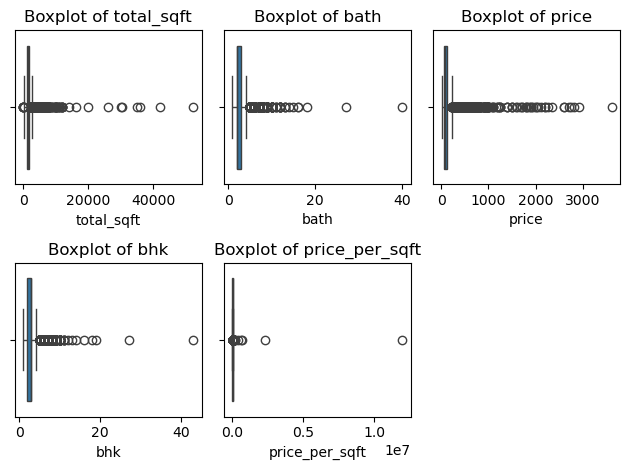

In [124]:
numeric_columns = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout() 
plt.show()

### IQR

In [207]:
#Detect outlier using IQR
for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)] #outliers
    print(f"Outliers detected in '{column}' column:\n", outliers, "\n")

    # data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    # Capping outliers to the bounds
    # Use the CLIP method to cap the outliers to the upper and lower bounds
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)


print("Data after removing outliers:\n", data)

Outliers detected in 'total_sqft' column:
 Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft]
Index: [] 

Outliers detected in 'bath' column:
 Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft]
Index: [] 

Outliers detected in 'price' column:
 Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft]
Index: [] 

Outliers detected in 'bhk' column:
 Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft]
Index: [] 

Outliers detected in 'price_per_sqft' column:
 Empty DataFrame
Columns: [location, size, total_sqft, bath, price, bhk, price_per_sqft]
Index: [] 

Data after removing outliers:
        location  size  total_sqft  bath   price  bhk  price_per_sqft
0            79    13      1056.0   2.0   39.07  2.0          3699.0
1            60    19      2600.0   4.5  120.00  4.0          4615.0
2           225    16      1440.0   2.0   62.00  3.0         

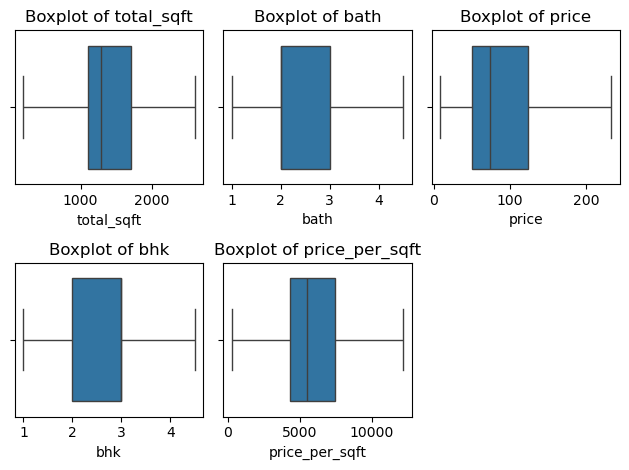

In [127]:
numeric_columns = ['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x=column)
    plt.title(f'Boxplot of {column}')

plt.tight_layout() 
plt.show()

In [149]:
data.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,4.5,120.00,4.0,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0


### Encoding

In [154]:
le_location = LabelEncoder()
data['location'] = le_location.fit_transform(data['location'])
le_size = LabelEncoder()
data['size'] = le_size.fit_transform(data['size'])

### Splitting X & Y

In [158]:
X = data.drop(columns=['price'])
y = data['price']

### Scaling

In [191]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

### Splitting into test data and train data

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Linear regression

In [195]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [197]:
y_pred = model.predict(X_test)

In [199]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [203]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2*100)

Mean Absolute Error: 10.15584870482135
Mean Squared Error: 276.1757236765955
R-squared: 92.79350148575536


In [205]:
# END